In [1]:
import sys
import scanpy as sc
import torch
import warnings
import numpy as np
import os
import pandas as pd
import copy
sys.path.append("../")
from stamarker.dataset import SpatialDataModule
from stamarker.pipeline import STAMarker, make_spatial_data
from stamarker.utils import parse_args
from sklearn.metrics import adjusted_rand_score
warnings.filterwarnings("ignore")
os.environ["R_HOME"] = r"D:\Program Files\R\R-4.0.3" # path to your R installation

# Load data

In [2]:
DLPFC_dir = "../dataset/DLPFC/"
section_id = "151507"
ann_data = sc.read_visium(os.path.join(DLPFC_dir, section_id), 
                          count_file=section_id + '_filtered_feature_bc_matrix.h5')
# load groud truth
ann_df = pd.read_csv(os.path.join(DLPFC_dir, section_id, section_id + "_truth.txt"),
                     sep="\t", header=None, index_col=0)
ann_df.columns = ["Manual annotation"]
ann_data.obs.loc[:, "Manual annotation"] = ann_df.loc[ann_data.obs_names, 'Manual annotation']
ann_data.var_names_make_unique()
print(ann_data)
data_module = make_spatial_data(ann_data)
data_module.prepare_data(rad_cutoff=150, n_top_genes=3000, min_counts=20)

AnnData object with n_obs × n_vars = 4226 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'Manual annotation'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'
After filtering:  (4226, 11982)
------Calculating spatial graph...
The graph contains 24770 edges, 4226 cells.
5.8613 neighbors per cell on average.


# Training procedure

In [4]:
config = dict()
config.update(parse_args("_params/model.yaml"))
config.update(parse_args("_params/trainer.yaml"))
if not torch.cuda.is_available():
        config["stagate_trainer"]["gpus"] = None
        config["classifier_trainer"]["gpus"] = None
# set number of autoencoders to 5 to save the training time. In the paper, we used 20 autoencoders.
model = STAMarker(5, "DLPFC_output", config)

In [4]:
model.train_auto_encoders(data_module)

Global seed set to 0
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 0


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Global seed set to 1
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 1


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Global seed set to 2
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 2


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Global seed set to 3
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 3


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Global seed set to 4
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 4


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

2024-07-14 15:42:21 INFO Finished training 5 auto-encoders


In [5]:
model.clustering(data_module, "mclust", 7)

2024-07-14 17:56:18 WARNING R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%
Save MClust results to DLPFC_output\version_0\cluster_labels.npy
fitting ...
  |======================================================================| 100%
Save MClust results to DLPFC_output\version_1\cluster_labels.npy
fitting ...
  |======================================================================| 100%
Save MClust results to DLPFC_output\version_2\cluster_labels.npy
fitting ...
  |======================================================================| 100%
Save MClust results to DLPFC_output\version_3\cluster_labels.npy
fitting ...
  |======================================================================| 100%


2024-07-14 17:56:36 INFO Finished 5 clustering with mclust


Save MClust results to DLPFC_output\version_4\cluster_labels.npy


Save consensus clustering plot to DLPFC_output\consensus_clustering.png


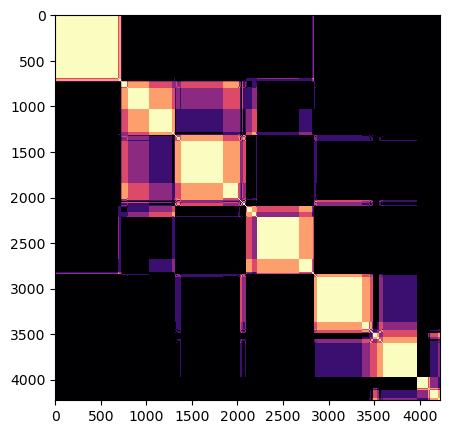

In [5]:
consensusl_labels = model.consensus_clustering(7, show_plot=True)
# takes ~2 min
# new version takes ~15s

In [6]:
model.train_classifiers(data_module, 7)

Global seed set to 0
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 0


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Global seed set to 1
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 1


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Global seed set to 2
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 2


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Global seed set to 3
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 3


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Global seed set to 4
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 4


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

2024-07-14 19:37:31 INFO Finished training 5 classifiers


# Visualize spatial domains

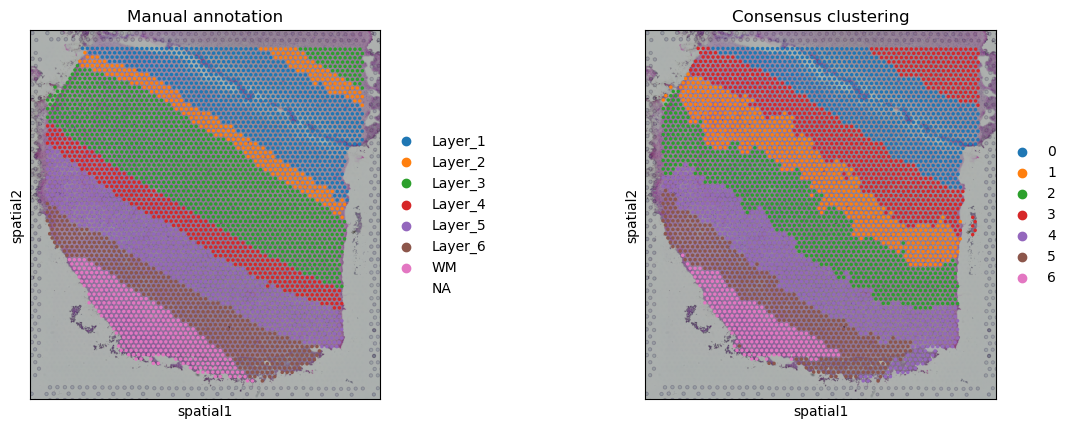

In [7]:
ann_data.obs["Consensus clustering"] = model.consensus_labels.astype(str)
sc.pl.spatial(ann_data, img_key="hires", color=["Manual annotation", "Consensus clustering"],
             title=["Manual annotation", "Consensus clustering"])

In [8]:
indices = np.logical_not(ann_data.obs["Manual annotation"].isna())
ground_truth = ann_data.obs["Manual annotation"].dropna()
ari = adjusted_rand_score(model.consensus_labels[indices], ground_truth[indices])
print("ARI: {:.4f}".format(ari))

ARI: 0.5282


# Compute saliency maps

In [16]:
def find_indices(ann_data, genes):
    gene_ids_df = pd.DataFrame(index=ann_data.var.index.tolist()).assign(index=range(3000))
    if isinstance(genes, set):
        genes = list(genes)
    indices = gene_ids_df.join(pd.DataFrame(index=genes).assign(method="find"))
    indices = gene_ids_df["index"][indices["method"] == "find"]
    return indices[genes]

In [9]:
import matplotlib.pyplot as plt
smaps = model.compute_smaps(data_module, return_recon=False)

In [10]:
n_cluster = 7
saliency_scores_df = pd.DataFrame(index=data_module.ann_data.var.index)
for ind in range(n_cluster):
    saliency_scores_df[f"score_{ind}"] = np.linalg.norm(smaps.iloc[model.consensus_labels == ind, :], axis=0)

In [23]:
saliency_scores_df.min()

score_0    0.000000
score_1    0.000000
score_2    0.000000
score_3    0.000000
score_4    0.000000
score_5    0.000000
score_6    0.002209
dtype: float32

Text(0, 0.5, 'Counts')

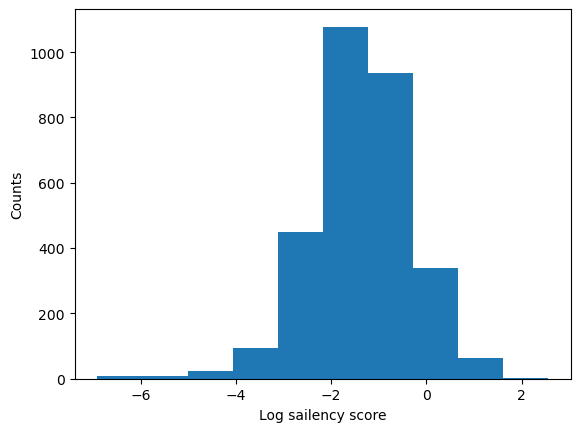

In [11]:
fig, ax = plt.subplots(1, 1)
ax.hist(np.log(saliency_scores_df["score_0"] + 1e-3))
ax.set_xlabel("Log sailency score")
ax.set_ylabel("Counts")

In [12]:
from stamarker.utils import select_svgs
domain_svg_list = []
smaps = pd.DataFrame(smaps)
for domain_ind in range(5):
    domain_svg_list.append(select_svgs(np.log(1e-3 + smaps), domain_ind, model.consensus_labels, alpha=1.25))